# Final Exam: Working with Data, Visualizations, Time-Series Data, Databases, and Natural Language Processing
## Instructions
* Answer all questions by filling in the code cells below.
* Provide explanations for your answers where required by adding markdown cells as you see fit.
* Comment your code where it is helpful to do so.
* Run and test your code cells to ensure they work correctly.
## Grading Criteria
There are 5 coding exercises. Each exercise is worth 40 points for a total of 200 points. Partial credit for incorrect results will be awarded, if you supply sufficient comments and explanations for me to follow your thought process. 
## Good Luck!

---
## Part 1: Working with Data
### Coding Exercise 1:
_Reading CSV Data_

1. Load the `air_quality_no2.csv` file provided on Canvas into a Pandas DataFrame. This data file contains NO2 (Nitrogen Dioxide) data collected from 3 different air quality monitoring stations over a period of time.
2. Display the first 5 rows.
3. Identify and count the missing values in each column.
4. Fill the missing values in each station's column with the mean of the column.
5. Duplicate rows may indicate an error in data collection. Test for this by counting duplicate rows. Display the count.

In [5]:
import pandas as pd


# Load the CSV file
df = pd.read_csv('air_quality_no2.csv')

# Display the first 5 rows
print(df.head())




              datetime  station_antwerp  station_paris  station_london
0  2019-05-07 02:00:00              NaN            NaN            23.0
1  2019-05-07 03:00:00             50.5           25.0            19.0
2  2019-05-07 04:00:00             45.0           27.7            19.0
3  2019-05-07 05:00:00              NaN           50.4            16.0
4  2019-05-07 06:00:00              NaN           61.9             NaN


In [6]:
# Sum the missing values
missing_val = df.isnull().sum()

print(missing_val)
# Fill missing values with the mean

df_filled = df.fillna(df.mean(numeric_only=True))

print(df_filled)


datetime             0
station_antwerp    940
station_paris       31
station_london      66
dtype: int64
                 datetime  station_antwerp  station_paris  station_london
0     2019-05-07 02:00:00        25.778947      27.740538        23.00000
1     2019-05-07 03:00:00        50.500000      25.000000        19.00000
2     2019-05-07 04:00:00        45.000000      27.700000        19.00000
3     2019-05-07 05:00:00        25.778947      50.400000        16.00000
4     2019-05-07 06:00:00        25.778947      61.900000        24.77709
...                   ...              ...            ...             ...
1030  2019-06-20 22:00:00        25.778947      21.400000        24.77709
1031  2019-06-20 23:00:00        25.778947      24.900000        24.77709
1032  2019-06-21 00:00:00        25.778947      26.500000        24.77709
1033  2019-06-21 01:00:00        25.778947      21.800000        24.77709
1034  2019-06-21 02:00:00        25.778947      20.000000        24.77709

[1035 

In [8]:
#check for duplicates rows and print the number found
dup_row_count = df.duplicated().sum()

print(dup_row_count)

0


---
## Part 2: Visualization
### Coding Exercise 2:
Use the dataframe you produced in Exercise 1 to do the following:
1. Using Matplotlib, create a _line plot_ showing the NO2 concentration over time. Plot the data from all 3 station on a single plot, using different colored lines to represent each station. Title the plot "NO2 Concentration Over Time", and include a *Legend* so that the person reading the plot knows which station each different colored line represents.
2. Using Seaborn, create a single boxplot to show the distribution of NO2 concentration for each station. Title the plot "Distribution of NO2 Concentration by Station". The plot should show the NO2 Level on the Y-Axis, and each station as a separate box along the X-Axis. 

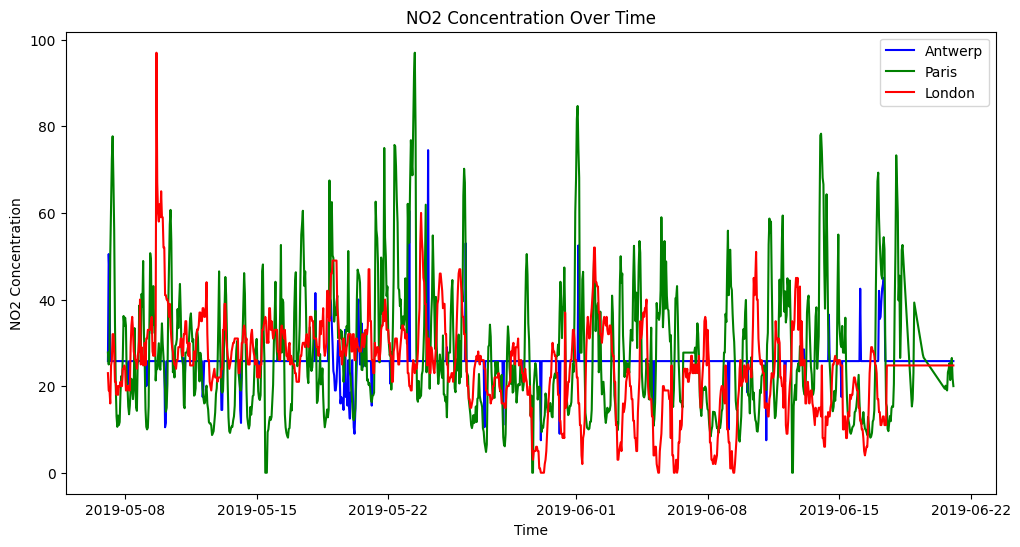

In [23]:
import matplotlib.pyplot as plt
# Create a line plot

plt.figure(figsize=(12, 6))
plt.plot(df_filled['datetime'], df_filled['station_antwerp'], label='Antwerp', color='blue')
plt.plot(df_filled['datetime'], df_filled['station_paris'], label='Paris', color='green')
plt.plot(df_filled['datetime'], df_filled['station_london'], label='London', color='red')
plt.title('NO2 Concentration Over Time')
plt.xlabel('Time')
plt.ylabel('NO2 Concentration')
plt.legend()
plt.show()

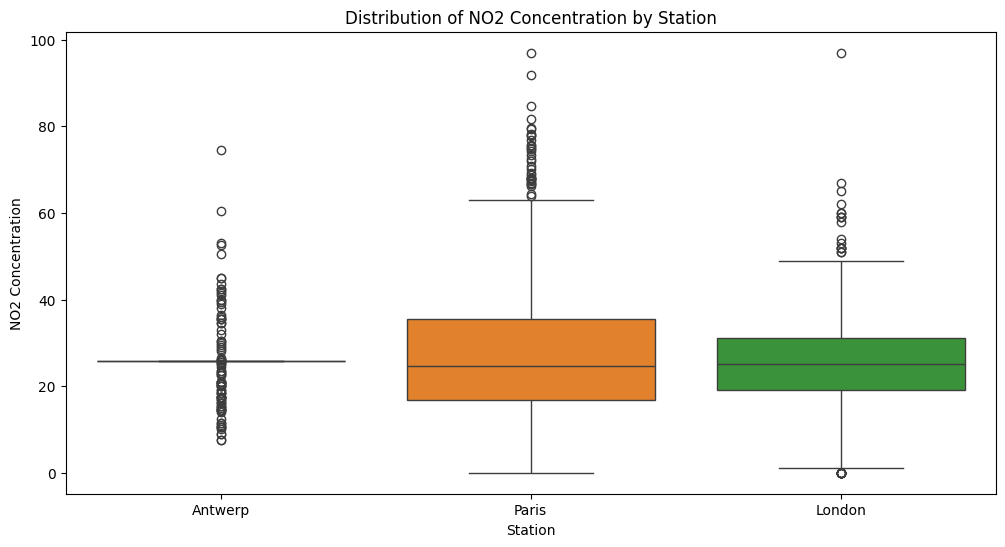

In [24]:
import seaborn as sns
# Create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_filled[['station_antwerp', 'station_paris', 'station_london']])
plt.title('Distribution of NO2 Concentration by Station')
plt.ylabel('NO2 Concentration')
plt.xlabel('Station')
plt.xticks([0, 1, 2], ['Antwerp', 'Paris', 'London'])
plt.show()

## Part 3: Working with time series data
### Coding Exercise 3:
Use the dataframe you produced in Exercise 1 to do the following:
1. Convert the 'datetime' column to datetime format.
2. Using the "set_index" method, Set the 'datetime' column as the index of the dataframe. This will transform the frame into a time series dataframe.
3. Resample the data to "Month End" frequency, and calculate the monthly average NO2 concentration for each station. Store the resampled data in a new dataframe and print the results.
4. Compute the rolling mean and rolling standard deviation of the NO2 concentration for each station with a window size of 30 days. Print the results.

In [37]:
# Convert the 'datetime' column to datetime format
df = pd.read_csv('air_quality_no2.csv')

df['datetime'] = pd.to_datetime(df['datetime'])

# Set the 'datetime' column as the index
df.set_index('datetime', inplace=True)

# Resample the data to a monthly average
monthly_avg = df.resample('ME').mean()
print(monthly_avg.head())

            station_antwerp  station_paris  station_london
datetime                                                  
2019-05-31        24.344156      27.749322       28.162116
2019-06-30        31.916667      27.728019       19.597911


In [33]:
# Compute rolling mean and standard deviation
rolling_mean = df.rolling(window=30).mean()
rolling_std = df.rolling(window=30).std()

print(rolling_mean)
print(rolling_std)


                     station_antwerp  station_paris  station_london
datetime                                                           
2019-05-07 02:00:00              NaN            NaN             NaN
2019-05-07 03:00:00              NaN            NaN             NaN
2019-05-07 04:00:00              NaN            NaN             NaN
2019-05-07 05:00:00              NaN            NaN             NaN
2019-05-07 06:00:00              NaN            NaN             NaN
...                              ...            ...             ...
2019-06-20 22:00:00              NaN      32.476667             NaN
2019-06-20 23:00:00              NaN      32.810000             NaN
2019-06-21 00:00:00              NaN      33.180000             NaN
2019-06-21 01:00:00              NaN      33.400000             NaN
2019-06-21 02:00:00              NaN      33.383333             NaN

[1035 rows x 3 columns]
                     station_antwerp  station_paris  station_london
datetime               

## Part 4: Working with database data
### Coding Exercise 4:
1. Connect to the SQLite database provided in the chinook.db file (same file as used in the homework 5 assignment).
2. Write a SQL query to find the total sales by each employee, sorted in descending order. Execute the query and store the results in a dataframe. Display the dataframe.
3. Using Matplotlib and Seaborn, Plot the total sales by each employee using a Seaborn bar plot. Display the Employee's Name on the X-Axis, and the Total Sales on the Y-Axis.

In [41]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('chinook.db')

# Write and execute the query
query = """
SELECT 
    e.FirstName || ' ' || e.LastName AS EmployeeName, 
    SUM(il.UnitPrice * il.Quantity) AS TotalSales
FROM 
    employees e
JOIN 
    customers c ON e.EmployeeId = c.SupportRepId
JOIN 
    invoices i ON c.CustomerId = i.CustomerId
JOIN 
    invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY 
    e.EmployeeId
ORDER BY 
    TotalSales DESC;
"""
df_sales = pd.read_sql_query(query, conn)

# Display results

print(df_sales)

    EmployeeName  TotalSales
0   Jane Peacock      833.04
1  Margaret Park      775.40
2  Steve Johnson      720.16


C:\Users\ERock\AppData\Local\Temp\ipykernel_10776\1174359437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EmployeeName', y='TotalSales', data=df_sales, palette='inferno')


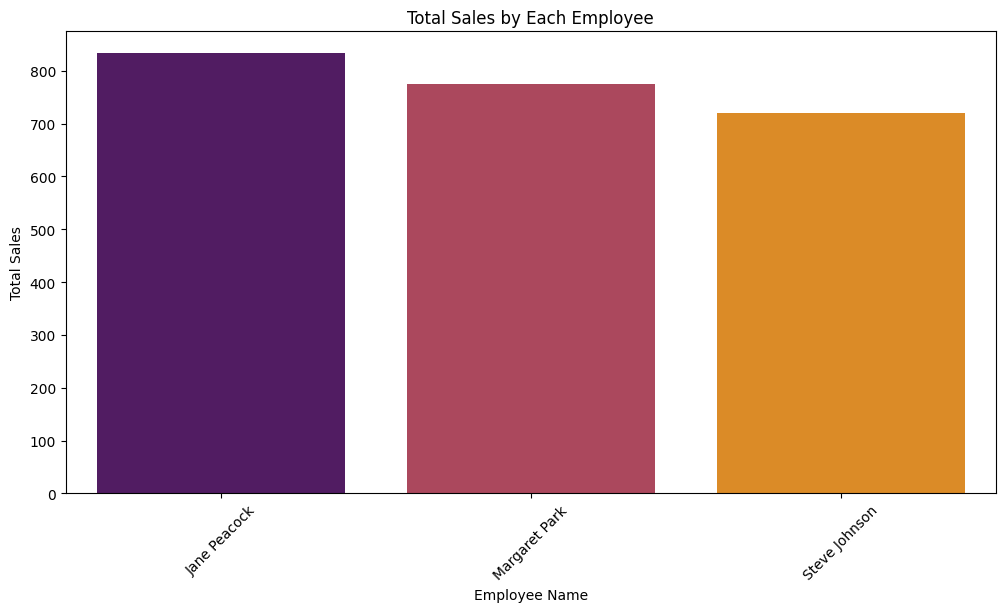

In [48]:
#Plot the total sales by employee here
plt.figure(figsize=(12, 6))
sns.barplot(x='EmployeeName', y='TotalSales', data=df_sales, palette='inferno')
plt.title('Total Sales by Each Employee')
plt.xlabel('Employee Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

## Part 5: Natural Language Processing
### Coding Exercise 5:
_Scenario_

Your friend Ima Slacker has been taking ENG 25001 this semester, but hasn't been keeping up with their assigned readings. Ima was supposed to read Jane Austin's Sense and Sensiblity but hasn't done so yet. Unfortunately a book report is due soon, so they came to you for help.
Perfrom the following using NLTK to help Ima:
1. Load Jane Austen's _Sense and Sensibility_ from the Gutenberg Corpus.
2. Tokenize the text into sentences.
3. Tokenize the text into words and remove the stopwords.
4. Create a frequency distribution of the words, and get the 50 most commonly used words from the frequency distribution.
5. You decide to make a summary of the text by selecting sentances from your list of tokenized sentances that contain the 50 most commonly used words. Build the summary as a string beginning with the first five sentances that match this criteria, then join on the middle 5 sentances, and finally join the last 5 sentances.
6. Ima knows that they probably won't get a great grade by writing their report from this summary, and asks you to create one of those cool looking word clouds so that they can at least have a nice graphic for the report's cover page. Generate and display a word cloud based on the word frequencies.

In [57]:
import nltk
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist

# Download necessary NLTK data
nltk.download('gutenberg')
nltk.download('stopwords')
nltk.download('punkt')

# Load Jane Austen's Sense and Sensibility "austen-sense.txt"  
emma = gutenberg.raw('austen-sense.txt')

# Tokenize the text into sentences
sentences = sent_tokenize(emma)

# Tokenize the text into words and remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Create a frequency distribution of the words
fdist = FreqDist(filtered_words)

# Get the 50 most common words from the frequency distribution
common_words = fdist.most_common(50)
common_words_set = set([word[0] for word in common_words])

# Create a summary by selecting sentences that contain the most common words
summary = []
for sentence in sentences:
    if any(word in sentence.lower() for word in common_words_set):
        summary.append(sentence)
    if len(summary) >= 15:
        break
        
# Prepare
# Join the first 5 summary sentences to start building a summary
summary_text = " ".join(summary[:5])

#Join the middle 5 summary sentances to the summary
summary_text += " ".join(summary[5:10]) 

#And finally join the last 5 summary sentances to the summary
summary_text += " ".join(summary[10:15])

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\ERock\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ERock\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ERock\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


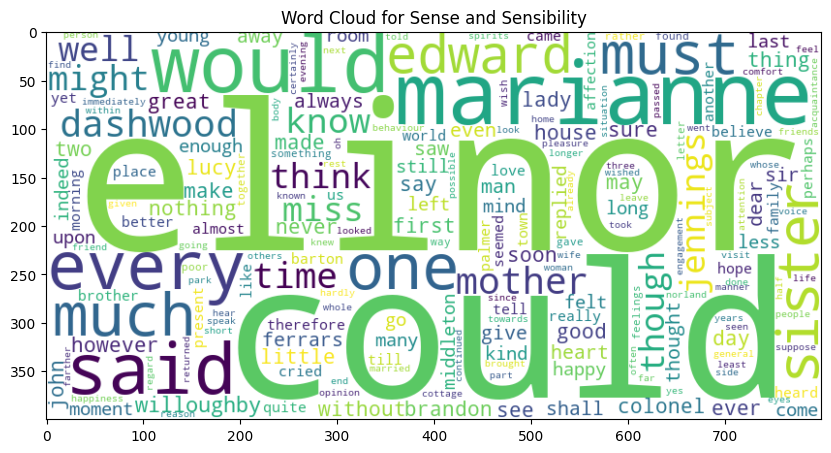

In [60]:
from wordcloud import WordCloud
# Generate and display a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Sense and Sensibility")
plt.show()

# Congratulations! 
This is the end of the final exam. 
Please submit your Jupyter Notebook File named `{yourFlashlineID}-FinalExam.ipynb` to Canvas.

I wish you all the best in your studies. Thanks for a great semester! 